In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob
import pickle as pkl
import glue

# Load and process raw files

In [ ]:
save_folder = "/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915"
file_names = glob.glob(os.path.join(save_folder, "weight_rank_task_*_seed_*.pkl"))

['/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_2AF_seed_3.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_4.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_2AF_seed_31.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_13.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_8.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_32.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_85.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_DMS_seed_29.pkl',
 '/mnt/home/hlethi/ceph/feature_learning_RNN/feature_learning_RNN_20240915/weight_rank_task_CXT_seed_90.pkl',
 '/mnt/home/h

In [ ]:
parsed_result_capacity = []
capacity_attrs = ["capacity", "dimension", "radius", "center_alignment",
                "axes_alignment", "center_axes_alignment"]
common_cols = ["lr", "weight_rank", "delta_W", "sign_sim", "rep_sim", "kernel_alignment", "seed", "task"]

for file_name in file_names:
    sample_file = pkl.load(open(file_name, "rb"))
    for i in sample_file:
        res = {key: i[key] for key in common_cols}
        capacity0 = res | {"status": "Untrained", "accuracy": i["acc_0"], "loss": i["loss_0"]}
        if i["capacity_0"] is None:
            for capacity_attr in capacity_attrs:
                capacity0[capacity_attr] = None
        else:
            for capacity_attr in capacity_attrs:
                if isinstance(i["capacity_0"], glue.utils.ManifoldAnalysisResults):
                    capacity0[capacity_attr] = getattr(i["capacity_0"], capacity_attr).item()
                else:
                    this_df_0 = i["capacity_0"].copy().reset_index().query("shuffle == False")
                    capacity0[capacity_attr] = this_df_0[capacity_attr].mean()


        capacityt = res | {"status": "Trained", "accuracy": i["acc_t"], "loss": i["loss_t"]}
        if i["capacity_t"] is None:
            for capacity_attr in capacity_attrs:
                capacityt[capacity_attr] = None
        else:
            for capacity_attr in capacity_attrs:
                if isinstance(i["capacity_t"], glue.utils.ManifoldAnalysisResults):
                    capacityt[capacity_attr] = getattr(i["capacity_t"], capacity_attr).item()
                else:
                    this_df = i["capacity_t"].copy().reset_index().query("shuffle == False")
                    capacityt[capacity_attr] = this_df[capacity_attr].mean()
        if capacity0["capacity"] is not None and capacityt["capacity"] is not None:
            delta_capacity = capacityt["capacity"] - capacity0["capacity"]
        else:
            delta_capacity = None
        parsed_result_capacity.append(capacity0 | {"delta_capacity": delta_capacity})
        parsed_result_capacity.append(capacityt | {"delta_capacity": delta_capacity})

result_df_cap = pd.DataFrame(parsed_result_capacity)
result_df_cap["kernel_alignment"] = [i.item() for i in result_df_cap["kernel_alignment"]]
rename_dict = {
    "delta_W": "weight_change",
    "sign_sim": "activation_sim"
}
result_df_cap = result_df_cap.rename(columns=rename_dict)

In [10]:
display(result_df_cap)

,lr,weight_rank,delta_W,sign_sim,rep_sim,kernel_alignment,seed,task,status,accuracy,loss,capacity,dimension,radius,center_alignment,axes_alignment,center_axes_alignment,delta_capacity
0,0.003,1,1.117890,0.243948,0.713881,0.134598,3,2AF,Untrained,0.000000,0.920191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003,1,1.117890,0.243948,0.713881,0.134598,3,2AF,Trained,0.918750,0.025931,0.094028,5.300445,1.666255,0.999998,0.998545,0.357514,NaN
2,0.003,5,1.154540,0.392948,0.969542,0.102813,3,2AF,Untrained,0.471875,1.024009,0.079909,6.268936,1.329109,1.000000,0.999987,0.325171,0.016117
3,0.003,5,1.154540,0.392948,0.969542,0.102813,3,2AF,Trained,0.909375,0.026376,0.096026,9.307167,1.822364,0.999826,0.966192,0.350269,0.016117
4,0.003,10,1.222111,0.425719,0.820731,0.536618,3,2AF,Untrained,0.000000,1.068644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.003,100,1.417886,0.645729,0.890275,0.519958,43,CXT,Trained,0.893750,0.032953,0.085516,12.839570,1.612585,0.982738,0.859058,0.298853,0.014514
2396,0.003,200,1.500402,0.685896,0.991678,0.471093,43,CXT,Untrained,0.240625,1.114830,0.074222,12.695250,1.026645,0.995642,0.805238,0.865901,0.014988
2397,0.003,200,1.500402,0.685896,0.991678,0.471093,43,CXT,Trained,0.887500,0.034314,0.089210,12.978560,1.537525,0.971954,0.866874,0.100109,0.014988
2398,0.003,300,1.425518,0.647708,0.965596,0.512947,43,CXT,Untrained,0.203125,1.082404,0.073216,12.940701,1.018406,0.996665,0.854434,0.892798,0.023278


# Plot the results

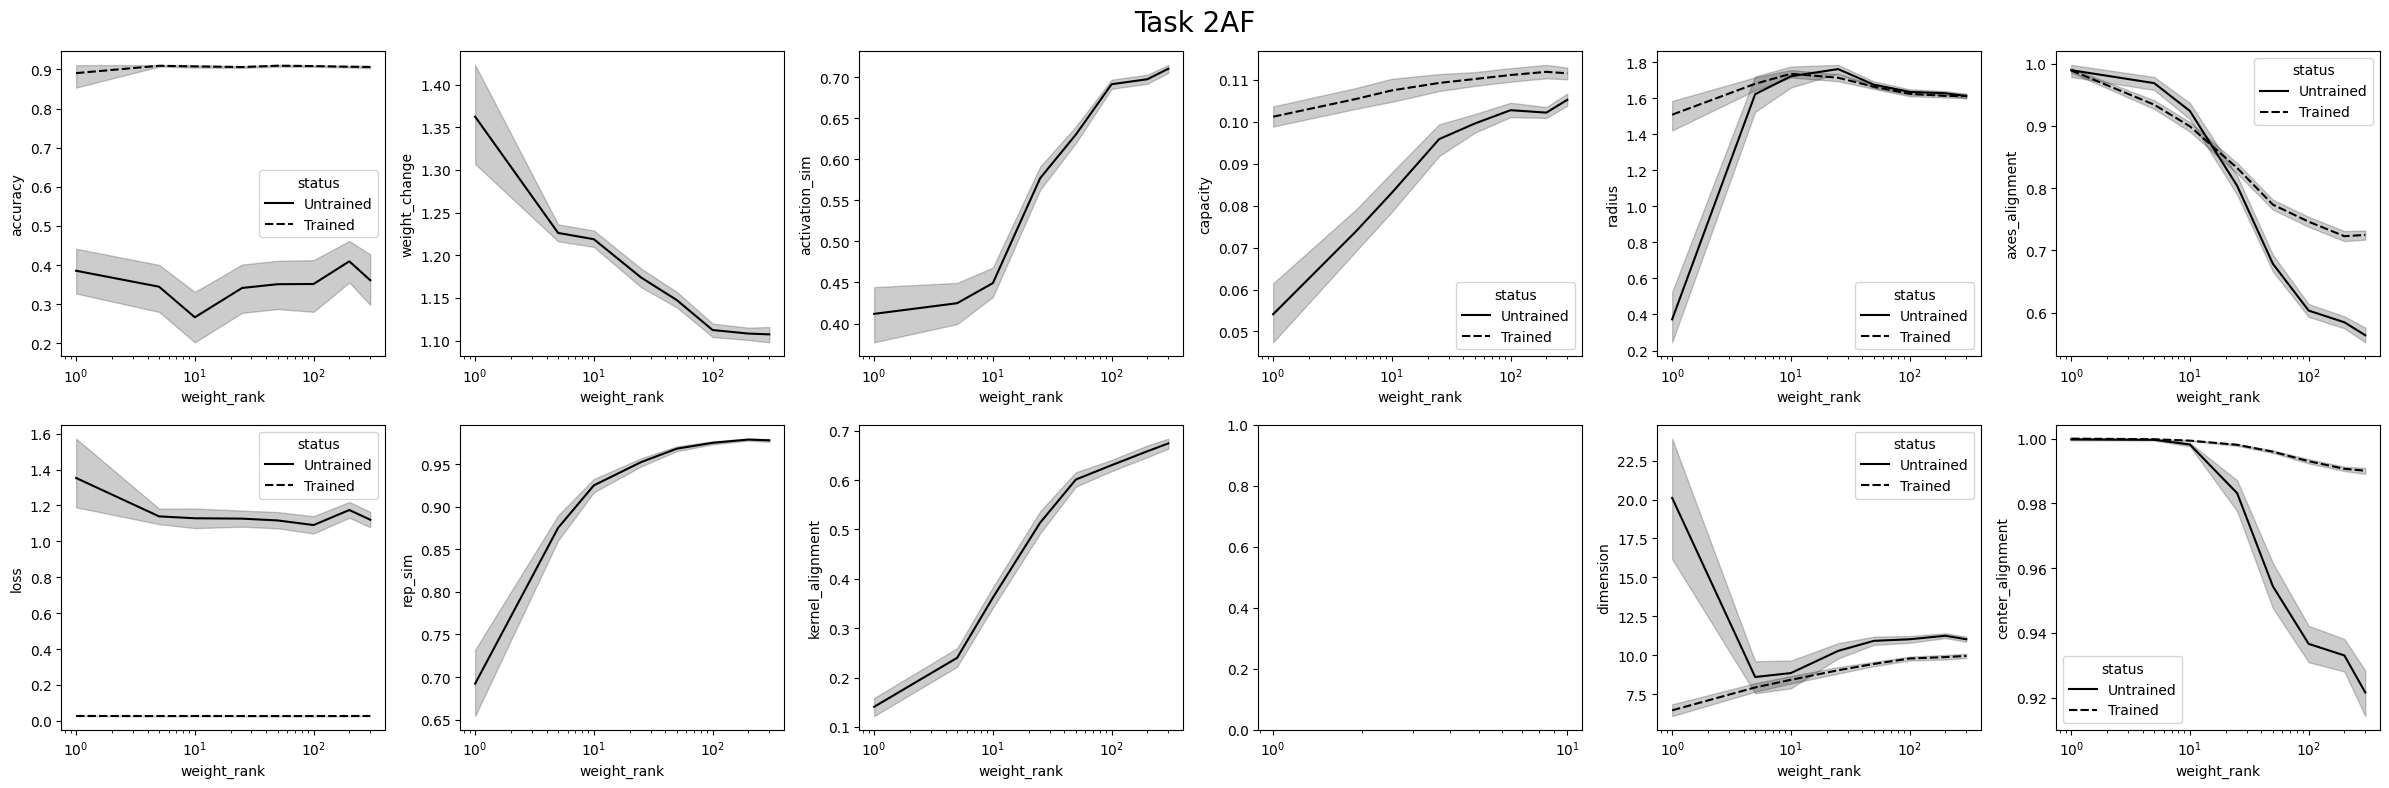

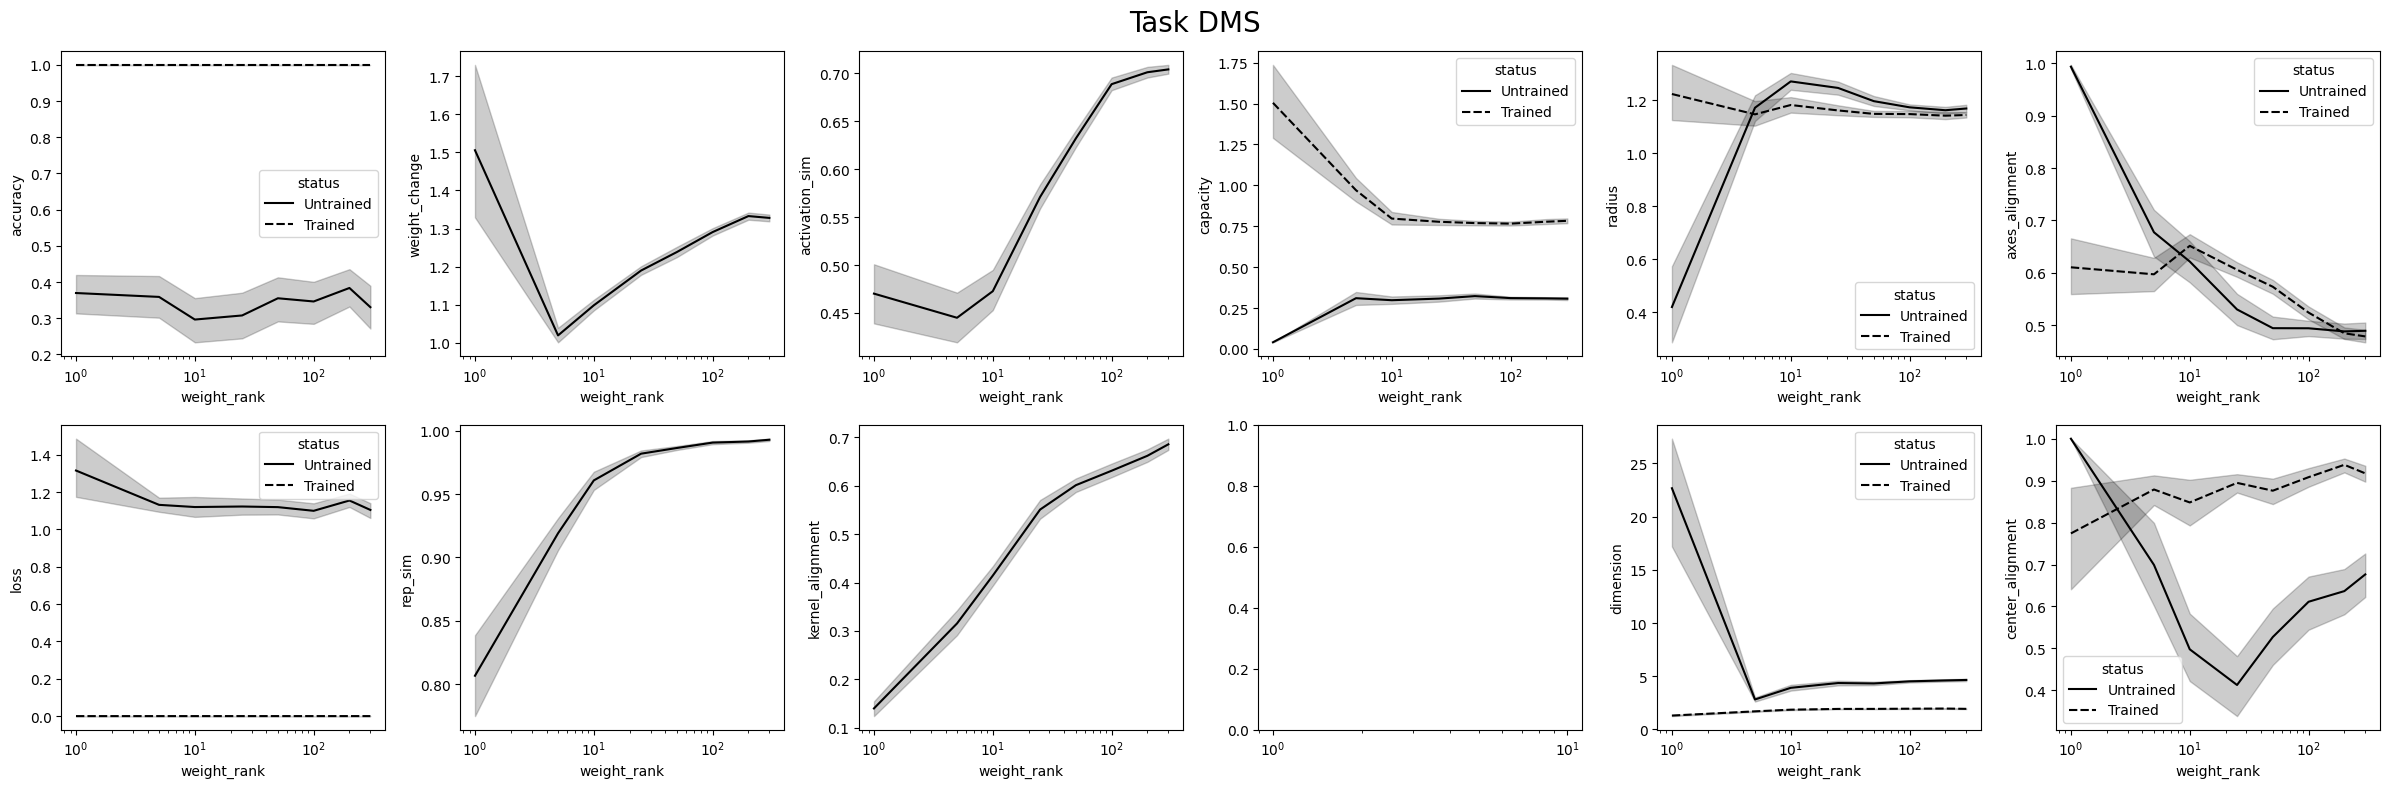

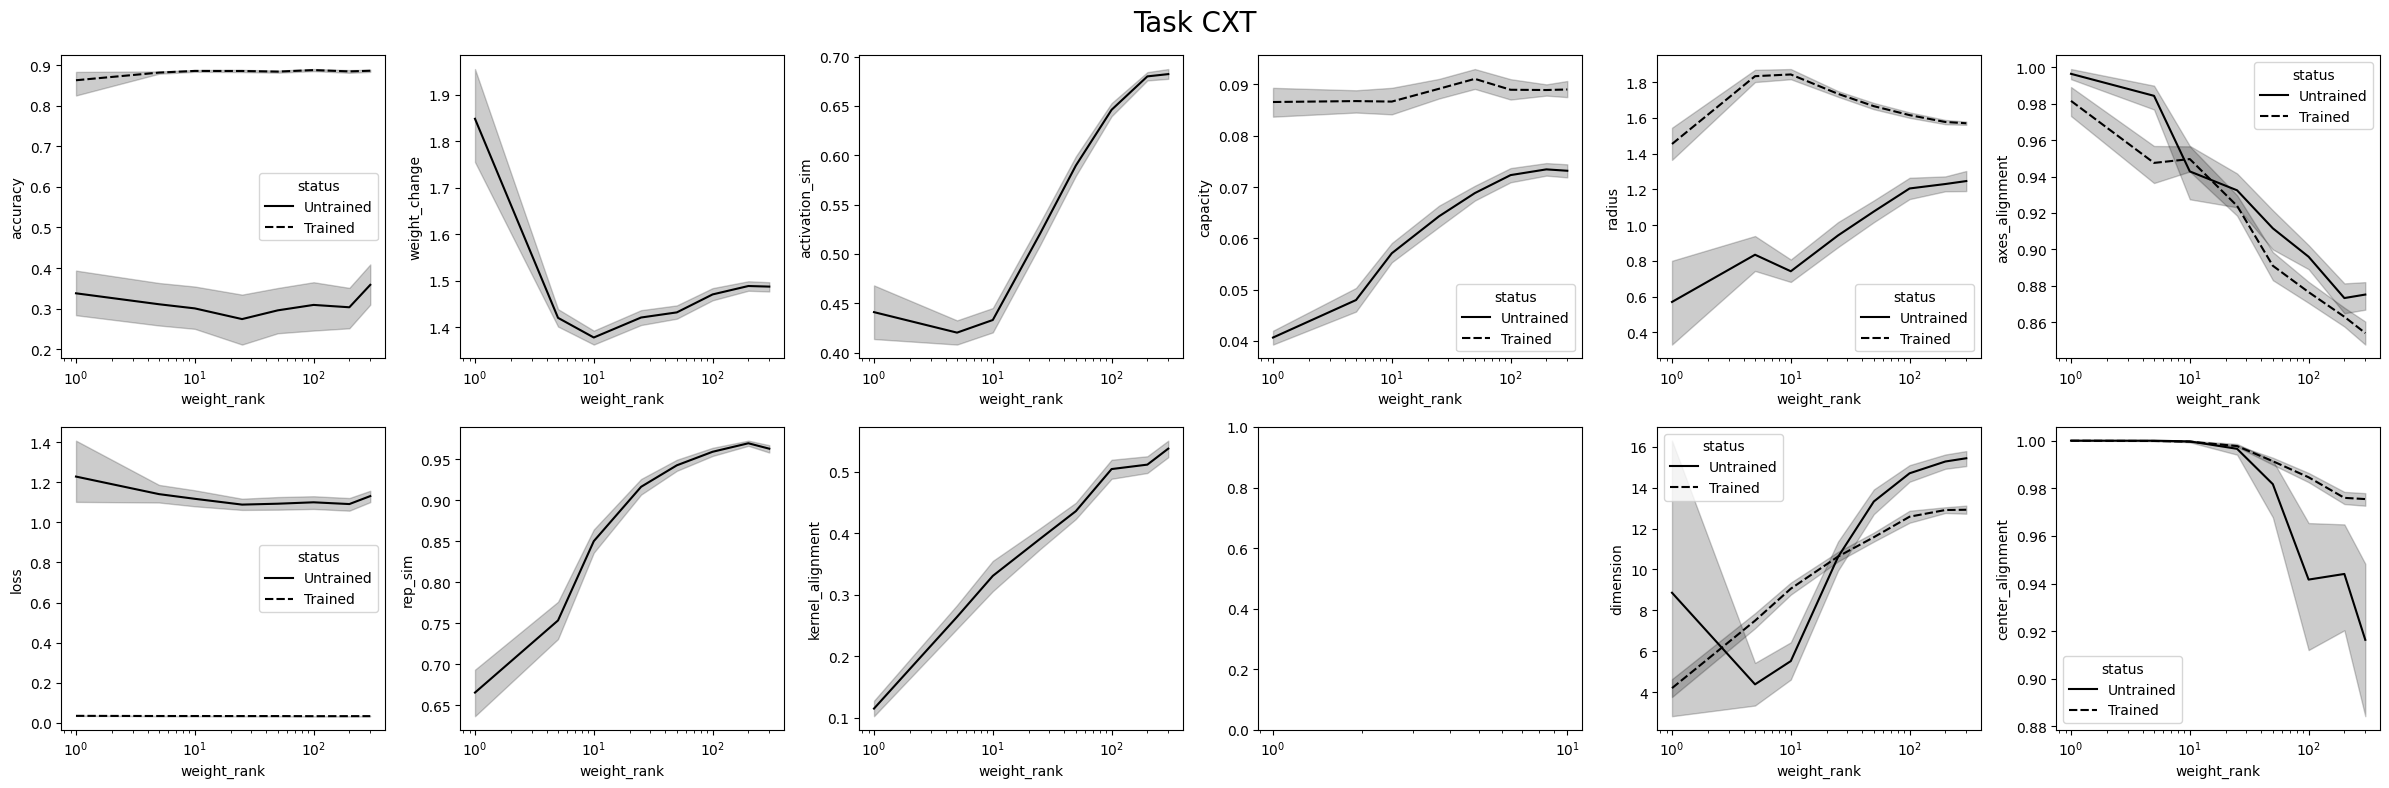

In [25]:
tasks = result_df_cap["task"].unique()
for task in tasks:
    fields_to_plot = [["accuracy", "weight_change", "activation_sim", "capacity", "radius", "axes_alignment"],
            ["loss", "rep_sim", "kernel_alignment", None, "dimension", "center_alignment"]]
    no_stage = ["weight_change", "activation_sim", "rep_sim", "kernel_alignment"]

    num_cols , num_rows = len(fields_to_plot[0]), len(fields_to_plot)
    plot_df = result_df_cap.query(f"task == '{task}'")
    fig, axs = plt.subplots(num_rows, num_cols)
    fig.set_figheight(4*num_rows)
    fig.set_figwidth(4*num_cols)
    for col in range(num_cols):
        for row in range(num_rows):
            ax = axs[row][col]
            col_name = fields_to_plot[row][col]
            if col_name is not None:
                if col_name in no_stage:
                    sns.lineplot(plot_df, x="weight_rank", y=col_name, ax=ax, color="black")
                else:
                    sns.lineplot(plot_df, x="weight_rank", y=col_name, style="status", ax=ax, color="black")
            ax.set_xscale("log")
    fig.suptitle(f"Task {task}", fontsize=20)
    plt.tight_layout()
    plt.show()